In [91]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [14]:
ratings = pd.read_csv('ratings.dat', 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [16]:
movies = pd.read_csv('movies.dat', 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])

Let's create a mapping for the ages buckets and occupations.

In [17]:
AGES = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
OCCUPATIONS = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

In [20]:
users = pd.read_csv('users.dat', 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
users['age_desc'] = users['age'].apply(lambda x: AGES[x])
users['occ_desc'] = users['occupation'].apply(lambda x: OCCUPATIONS[x])

We see a 4.5% observation rate, relatively sparse matrix.

In [34]:
num_users = ratings['user_id'].nunique()
num_ratings = len(ratings)
num_movies = ratings['movie_id'].nunique()
observ_rate = num_ratings / num_users / num_movies
print(observ_rate)

0.044683625622312845


In [37]:
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A325EFE0B8>]],
      dtype=object)

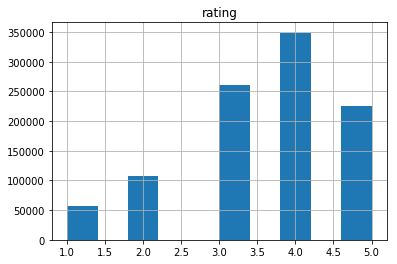

In [61]:
ratings.hist(column='rating')

A quick look at the ratings shows the average rating is slightly above 3.5, with the distribution is skewed to the left. This seems to suggest that watch and rate movies that they like.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A32761B198>]],
      dtype=object)

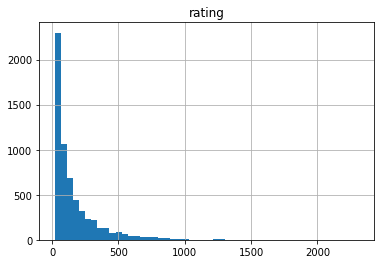

In [65]:
nr_user = ratings.groupby('user_id').count()
nr_user.hist(column='rating', bins=50)

The number of ratings left by each user has a long tail distribution. Most users rate only a few movies and a few super users rate a lot of movies.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A327CA7160>]],
      dtype=object)

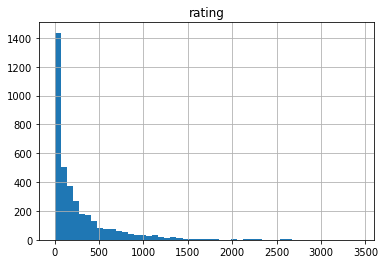

In [66]:
nr_item = ratings.groupby('movie_id').count()
nr_item.hist(column='rating', bins=50)

The number of ratings for each movie also has a similar distribution. We can see that most movies are rated by a few number of users while a few blockbuster films are rated by a lot of people.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A327CB35C0>]],
      dtype=object)

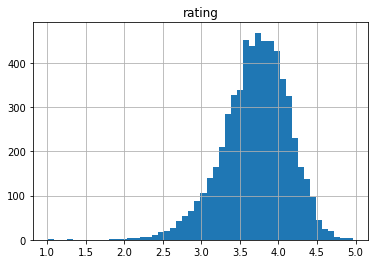

In [67]:
mr_user = ratings.groupby('user_id').mean()
mr_user.hist(column='rating',bins=50)

Most users give a rating around 4.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A327FD4160>]],
      dtype=object)

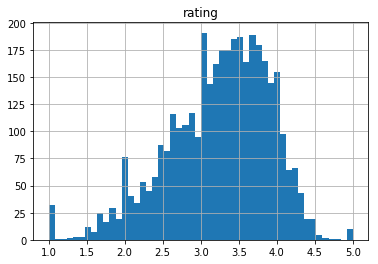

In [68]:
mr_item = ratings.groupby('movie_id').mean()
mr_item.hist(column='rating',bins=50)

Most movies followed a similar distribution. Most received 3 or 4 rating, with some expectionally good/bad movies.

In [84]:
num_rate_avg_rate = pd.merge(nr_user.reset_index(),
                    mr_user.reset_index(),
                    on='user_id')

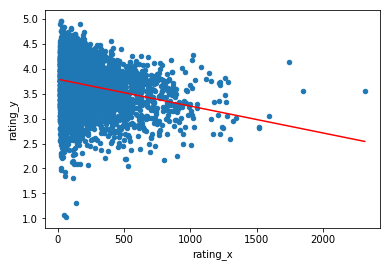

In [96]:
num_rate_avg_rate.plot.scatter(x='rating_x', y='rating_y')
gradient, intercept, r_value, p_value, std_err = stats.linregress(num_rate_avg_rate.rating_x,
                                                                  num_rate_avg_rate.rating_y)
mn=np.min(num_rate_avg_rate.rating_x)
mx=np.max(num_rate_avg_rate.rating_x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x1,y1,'-r')

In [88]:
num_rate_avg_rate_movie = pd.merge(nr_item.reset_index(),
                    mr_item.reset_index(),
                    on='movie_id')

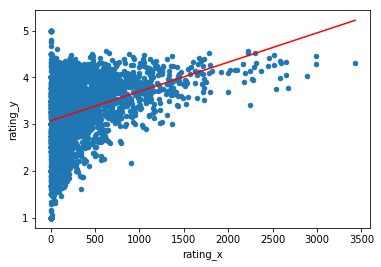

In [95]:
num_rate_avg_rate_movie.plot.scatter(x='rating_x', y='rating_y')
gradient, intercept, r_value, p_value, std_err = stats.linregress(num_rate_avg_rate_movie.rating_x,
                                                                  num_rate_avg_rate_movie.rating_y)
mn1=np.min(num_rate_avg_rate_movie.rating_x)
mx1=np.max(num_rate_avg_rate_movie.rating_x)
x2=np.linspace(mn1,mx1,500)
y2=gradient*x2+intercept
plt.plot(x2,y2,'-r')